<a href="https://colab.research.google.com/github/marcinBrzew/Todo/blob/master/BOT_EMA_SMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance 
!pip install mpl_finance
import yfinance as yf
import mpl_finance as fplt
from mpl_finance import candlestick_ohlc
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd



In [ ]:
df=yf.download('EURUSD=X',start='2022-02-12',interval='15m')
df.head()

In [ ]:
def strategy(df,sma1,sma2):
  df=df.copy()
  df['ret']=np.log(df.Close.pct_change()+1) 
  df['SMA1']=df.Close.ewm(sma1).mean()
  df['SMA2']=df.Close.rolling(sma2).mean()
  df['Green']=df.Close<df.Open
  # df['SMA2']=df.Close.rolling(sma2).mean()
  df=df.dropna()
  df['position']=np.where((df['SMA1']>df['SMA2'])&(df.Close.ewm(sma1).mean()>df.Open)&(df.Close.ewm(sma1).mean()<df.Close),1,0)
  df['stratret']=df['position'].shift(1)*df['ret']
  df.dropna()
  return df

In [ ]:
df.tail()
df.isna().sum()
#Engulfing Strategy Pattern
def Revsignal1(df):
  length=len(df)
  high=list(df['High'])
  low=list(df['Low'])
  close=list(df['Close'])
  open=list(df['Open'])
  signal=[0]*length
  bodydiff=[0]*length

  for row in range(1,length):
      bodydiff[row]=abs(open[row]-close[row])
      bodydiff=0.003
     

In [ ]:
def performance(df):
  return np.exp(df[['ret','stratret']].sum())

In [ ]:
performance(strategy(df,6,14))

ret         1.001363
stratret    0.998301
dtype: float64

In [ ]:
stratdf=strategy(df,6,14)


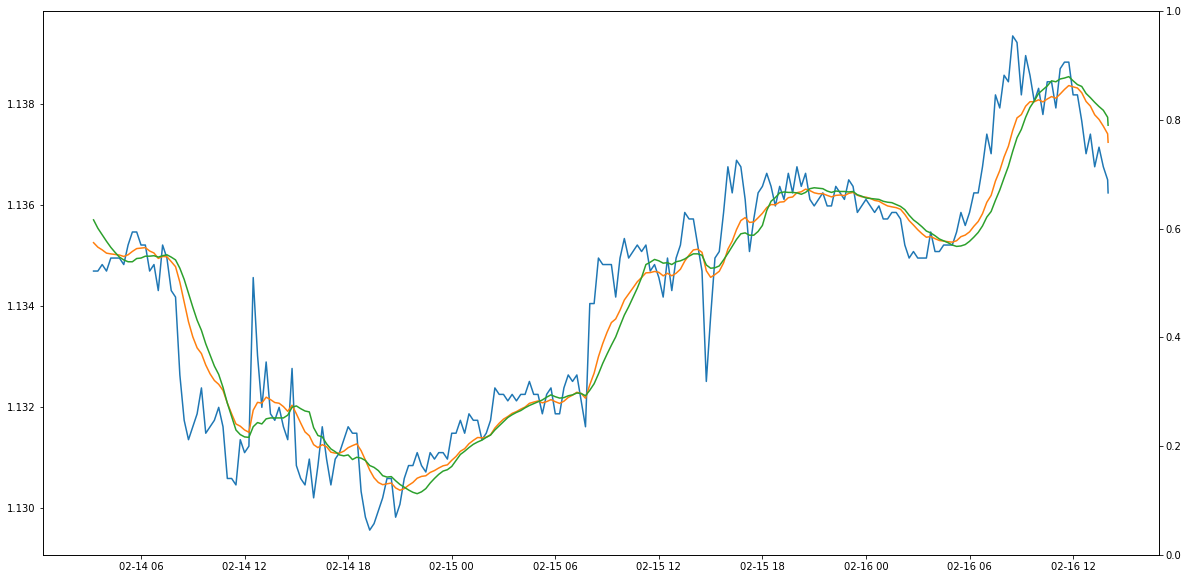

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))

ax2=ax.twinx()
ax.plot(stratdf[['Close','SMA1','SMA2']])

#ax2.plot(stratdf['position']==1,'V')

In [ ]:
SMA_list1=range(6,9,3)
SMA_list2=range(15,20,3)


In [ ]:
def Tester(SMA_list1,SMA_list2):
    profits=[]
    a,b=[],[]

    for i,e in zip(SMA_list1,SMA_list2):
      profit=performance(strategy(df,i,e))
      profits.append(profit)
      a.append(i)
      b.append(e)
    col={'level_0':'SMA1','level_1':'SMA2'}
    frame=pd.DataFrame(profits,[a,b])
    frame['edge']=frame.stratret-frame.ret
    return frame.sort_values('edge', ascending=False)

In [ ]:
Tester(SMA_list1,SMA_list2)

,,ret,stratret,edge
6,15,1.001363,0.997621,-0.003742


NameError: ignored